In [1]:
#required librarries
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
%matplotlib inline
import plotly.express as px
import plotly.figure_factory as ff
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso ,ridge_regression,RidgeCV,LassoCV,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn.model_selection import KFold,cross_val_score,RandomizedSearchCV,GridSearchCV

In [2]:
# getting the visualising the data
df =pd.read_csv('ipl.csv')
print(df.shape)
df.head()

(76014, 15)


mid        date                  venue               bat_team  \
0    1  2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   
1    1  2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   
2    1  2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   
3    1  2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   
4    1  2008-04-18  M Chinnaswamy Stadium  Kolkata Knight Riders   

                     bowl_team      batsman   bowler  runs  wickets  overs  \
0  Royal Challengers Bangalore   SC Ganguly  P Kumar     1        0    0.1   
1  Royal Challengers Bangalore  BB McCullum  P Kumar     1        0    0.2   
2  Royal Challengers Bangalore  BB McCullum  P Kumar     2        0    0.2   
3  Royal Challengers Bangalore  BB McCullum  P Kumar     2        0    0.3   
4  Royal Challengers Bangalore  BB McCullum  P Kumar     2        0    0.4   

   runs_last_5  wickets_last_5  striker  non-striker  total  
0            1               0        0            0    222  
1            1               0        0            0    222  
2            2               0        0            0    222  
3            2               0        0            0    222  
4            2               0        0            0    222

# understanding the data 
* mid = match id of the corresponding
* data= date of the match
* venue=place where match is going on
* bat_team - batting team 
* bowl_team = bowling team
* batsman = name of the player currently on strike
* bowler = name of the player currently bowling
* runs = runs scored by batsman for particular ball
* overs= current over 
* runs_last_5 = euns scored in last five over w.r.t to that over 
* wickets_last_5=wickets in last 5 over w.r.t to that over 
* striker =runs scored by stricker
* non_striker=run scored by non striker
* total= total runs dcored in that match 

### what i did  ?
* I dropped batsman, bowler columns since there are lots of vowler and batsman names wgich is diffult to encode and decode
* dropped mid and date they are uniques for each maths its of no use for modelling
* dropped overs less then 5
* created new variable year to split the data and to predict new seasons data
* dropped non consistent franchise 
* encoded bowling, batting team and venue 
* scaled the independent variables for applying various algorithm
* checked the accuracy of various algos
* hyper parameter tuning of best performing algo 
* saving the model into pickle file 


In [3]:
# making new variable for forcasting and splitting
df['year']=pd.to_datetime(df.date,format="%Y-%m-%d").dt.year
df.drop('date',axis=1,inplace=True)
df.head()


mid                  venue               bat_team  \
0    1  M Chinnaswamy Stadium  Kolkata Knight Riders   
1    1  M Chinnaswamy Stadium  Kolkata Knight Riders   
2    1  M Chinnaswamy Stadium  Kolkata Knight Riders   
3    1  M Chinnaswamy Stadium  Kolkata Knight Riders   
4    1  M Chinnaswamy Stadium  Kolkata Knight Riders   

                     bowl_team      batsman   bowler  runs  wickets  overs  \
0  Royal Challengers Bangalore   SC Ganguly  P Kumar     1        0    0.1   
1  Royal Challengers Bangalore  BB McCullum  P Kumar     1        0    0.2   
2  Royal Challengers Bangalore  BB McCullum  P Kumar     2        0    0.2   
3  Royal Challengers Bangalore  BB McCullum  P Kumar     2        0    0.3   
4  Royal Challengers Bangalore  BB McCullum  P Kumar     2        0    0.4   

   runs_last_5  wickets_last_5  striker  non-striker  total  year  
0            1               0        0            0    222  2008  
1            1               0        0            0    222  2008  
2            2               0        0            0    222  2008  
3            2               0        0            0    222  2008  
4            2               0        0            0    222  2008

In [4]:
#encoding the venues using the label encoders
le=LabelEncoder()
df.venue=le.fit_transform(df.venue)
encoded_venue=sorted(df.venue.unique())
array=le.inverse_transform(encoded_venue)
encoded_dict={v:k for v,k in enumerate(array)}
encoded_dict

{0: 'Barabati Stadium',
 1: 'Brabourne Stadium',
 2: 'Buffalo Park',
 3: 'De Beers Diamond Oval',
 4: 'Dr DY Patil Sports Academy',
 5: 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium',
 6: 'Dubai International Cricket Stadium',
 7: 'Eden Gardens',
 8: 'Feroz Shah Kotla',
 9: 'Green Park',
 10: 'Himachal Pradesh Cricket Association Stadium',
 11: 'Holkar Cricket Stadium',
 12: 'JSCA International Stadium Complex',
 13: 'Kingsmead',
 14: 'M Chinnaswamy Stadium',
 15: 'MA Chidambaram Stadium, Chepauk',
 16: 'Maharashtra Cricket Association Stadium',
 17: 'Nehru Stadium',
 18: 'New Wanderers Stadium',
 19: 'Newlands',
 20: 'OUTsurance Oval',
 21: 'Punjab Cricket Association IS Bindra Stadium, Mohali',
 22: 'Punjab Cricket Association Stadium, Mohali',
 23: 'Rajiv Gandhi International Stadium, Uppal',
 24: 'Sardar Patel Stadium, Motera',
 25: 'Saurashtra Cricket Association Stadium',
 26: 'Sawai Mansingh Stadium',
 27: 'Shaheed Veer Narayan Singh International Stadium',
 28: 'Sharjah 

In [5]:
# dropping useless data
df.drop(['mid','batsman','bowler',],axis=1,inplace=True)
remove=df.loc[df['overs']<5].index
df.drop(remove,axis=0,inplace=True)

In [6]:
#info about data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56707 entries, 32 to 76013
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   venue           56707 non-null  int32  
 1   bat_team        56707 non-null  object 
 2   bowl_team       56707 non-null  object 
 3   runs            56707 non-null  int64  
 4   wickets         56707 non-null  int64  
 5   overs           56707 non-null  float64
 6   runs_last_5     56707 non-null  int64  
 7   wickets_last_5  56707 non-null  int64  
 8   striker         56707 non-null  int64  
 9   non-striker     56707 non-null  int64  
 10  total           56707 non-null  int64  
 11  year            56707 non-null  int64  
dtypes: float64(1), int32(1), int64(8), object(2)
memory usage: 5.4+ MB


In [7]:
# description of data
df.describe()

venue          runs       wickets         overs   runs_last_5  \
count  56707.000000  56707.000000  56707.000000  56707.000000  56707.000000   
mean      17.534625     94.443226      3.051175     12.318063     38.603982   
std        9.587524     40.442522      1.909955      4.321427     11.421741   
min        0.000000     13.000000      0.000000      5.000000      7.000000   
25%        8.000000     62.000000      2.000000      8.500000     31.000000   
50%       15.000000     90.000000      3.000000     12.300000     38.000000   
75%       25.000000    123.000000      4.000000     16.200000     46.000000   
max       34.000000    263.000000     10.000000     19.600000    113.000000   

       wickets_last_5       striker   non-striker         total          year  
count    56707.000000  56707.000000  56707.000000  56707.000000  56707.000000  
mean         1.315270     30.081507     10.648844    161.074488   2012.481369  
std          1.064091     20.406887     11.706662     29.102974      2.761059  
min          0.000000      0.000000      0.000000     67.000000   2008.000000  
25%          1.000000     15.000000      2.000000    142.000000   2010.000000  
50%          1.000000     26.000000      7.000000    162.000000   2012.000000  
75%          2.000000     41.000000     16.000000    181.000000   2015.000000  
max          7.000000    175.000000    109.000000    263.000000   2017.000000

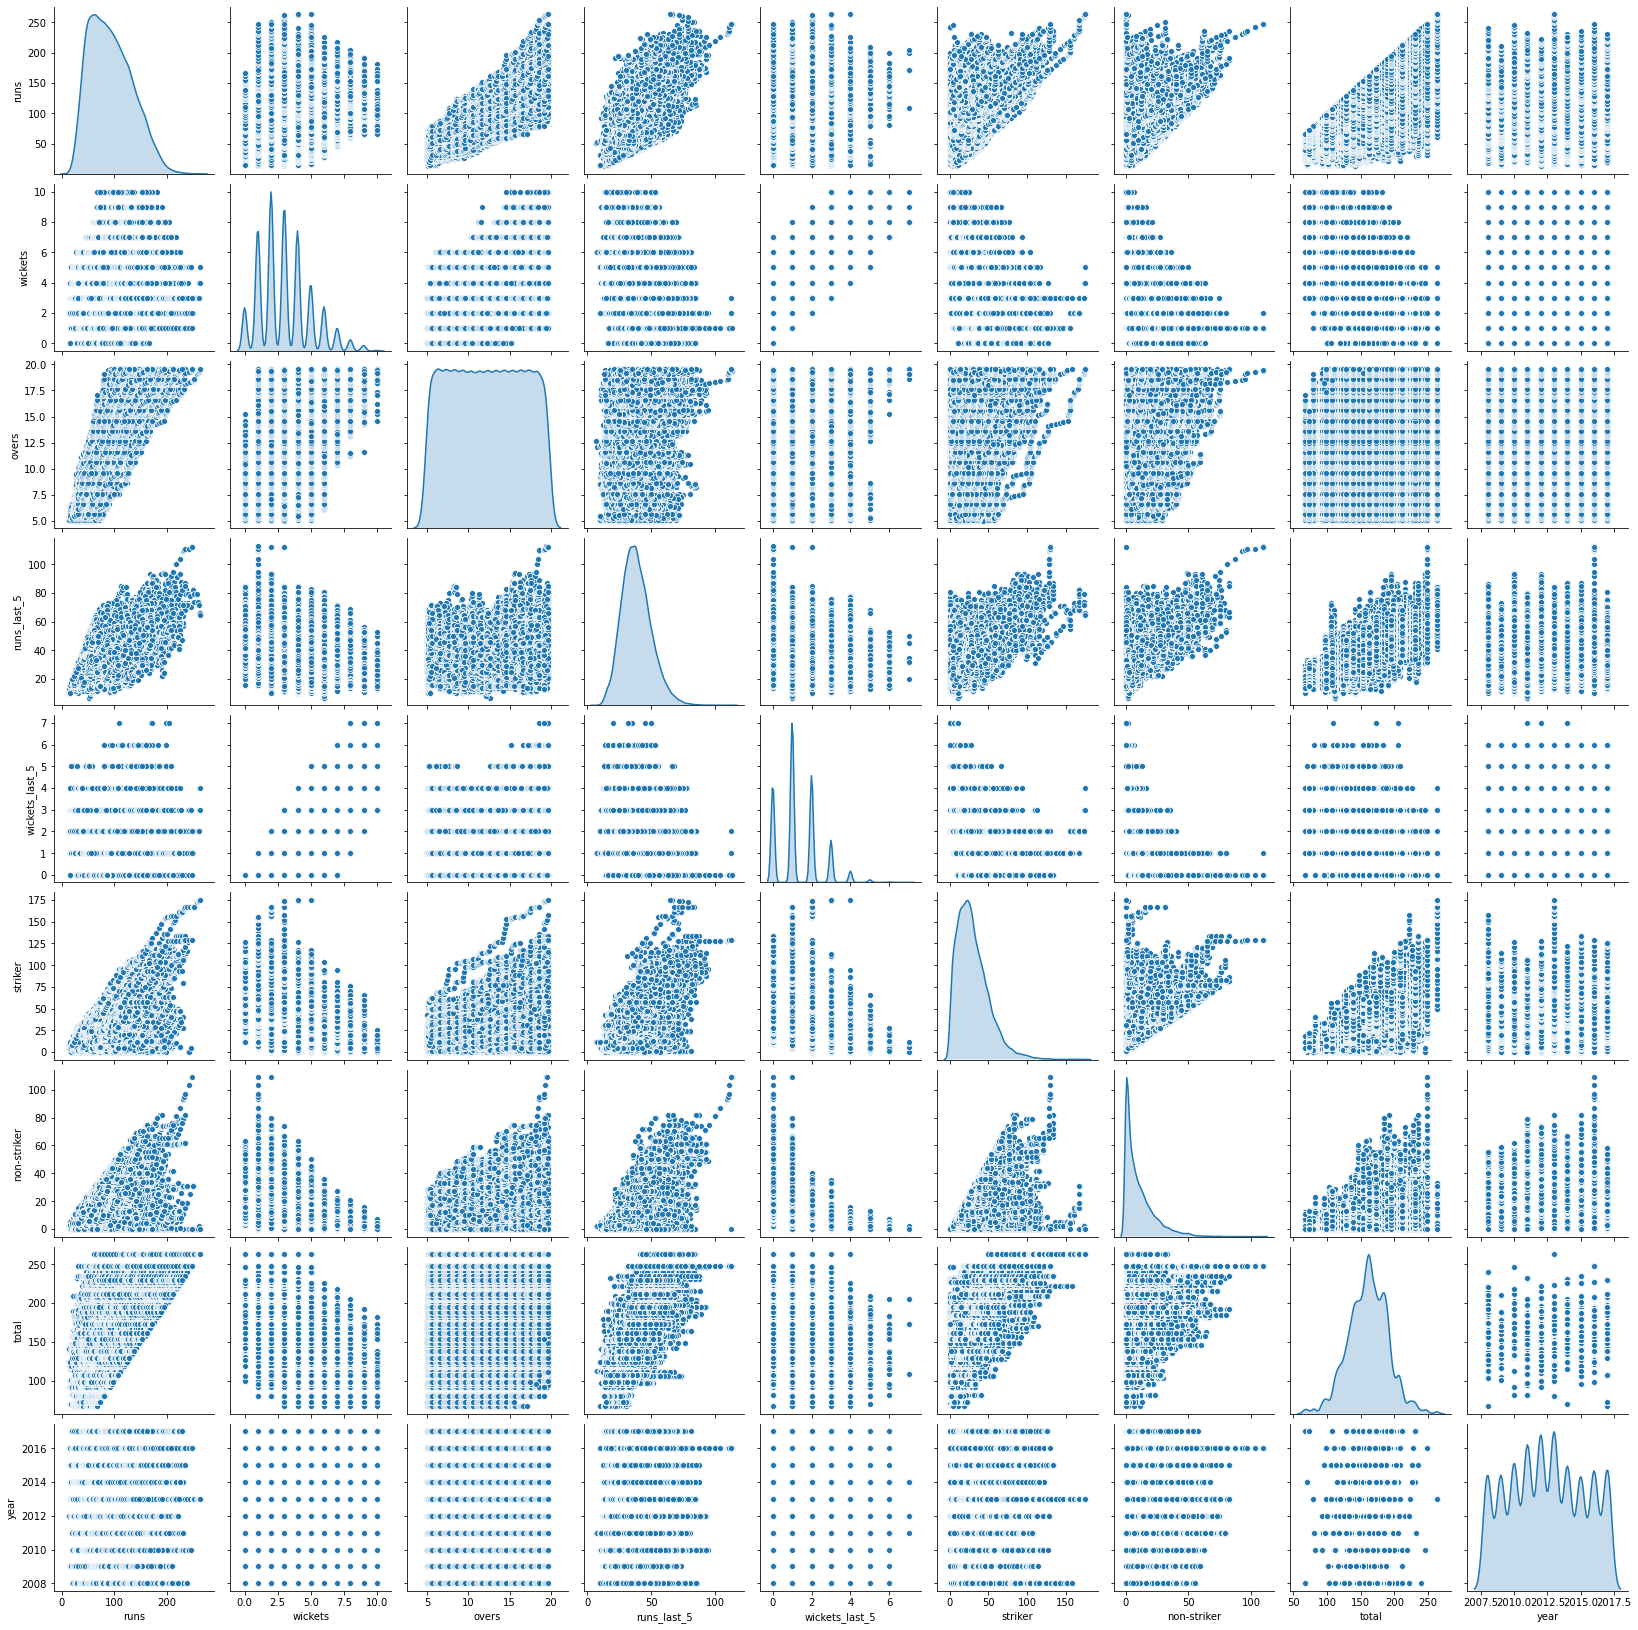

In [8]:
# visulisalisation of data
sns.pairplot(df.iloc[0:,3:],diag_kind='kde')
# i guess there is multi collinearity in the data


In [9]:
#this can be done using seaborn i just used plotly figure factory
cormatrix=df.corr()
z=np.around(cormatrix,decimals=3).values
y=cormatrix.keys().to_list()
ff.create_annotated_heatmap(z=z,y=y,x=y)

In [10]:
# replacing the old franchise with new one 
df.bat_team.replace('Deccan Chargers','Sunrisers Hyderabad',inplace=True)
df['bat_team'].replace('Delhi Daredevils','Delhi Capitals',inplace=True)
df.bowl_team.replace('Deccan Chargers','Sunrisers Hyderabad',inplace=True)
df.bowl_team.replace('Delhi Daredevils','Delhi Capitals',inplace=True)

In [11]:
#remove  other franchise which are not consistant
consistent_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
                    'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
                    'Delhi Capitals', 'Sunrisers Hyderabad']
df = df[(df['bat_team'].isin(consistent_teams)) & (df['bowl_team'].isin(consistent_teams))]

In [12]:
# encoding the batting team 
bat_team_encoder=LabelEncoder()
df.bat_team=bat_team_encoder.fit_transform(df.bat_team)
encoded_bat=sorted(df.bat_team.unique())
bat=bat_team_encoder.inverse_transform(encoded_bat)
encoded_dict_bat={v:k for v,k in enumerate(bat)}

encoded_dict_bat


{0: 'Chennai Super Kings',
 1: 'Delhi Capitals',
 2: 'Kings XI Punjab',
 3: 'Kolkata Knight Riders',
 4: 'Mumbai Indians',
 5: 'Rajasthan Royals',
 6: 'Royal Challengers Bangalore',
 7: 'Sunrisers Hyderabad'}

In [13]:
# encoding bowling team 
bowl_team_encoder=LabelEncoder()
df.bowl_team=bowl_team_encoder.fit_transform(df.bowl_team)
encoded_bowl=sorted(df.bowl_team.unique())
bowl=bowl_team_encoder.inverse_transform(encoded_bowl)
encoded_dict_bowl={v:k for v,k in enumerate(bowl)}
encoded_dict_bowl

{0: 'Chennai Super Kings',
 1: 'Delhi Capitals',
 2: 'Kings XI Punjab',
 3: 'Kolkata Knight Riders',
 4: 'Mumbai Indians',
 5: 'Rajasthan Royals',
 6: 'Royal Challengers Bangalore',
 7: 'Sunrisers Hyderabad'}

In [14]:
# splitting the data for predicting new season score
x=df.drop('total',axis=1)
x_train=x[x['year']!=2017]
x_train.head()
x_train=x_train.drop('year',axis=1)
x_test=x[x['year']==2017]
x_test=x_test.drop('year',axis=1)
x=df.drop(['year','total'],axis=1)
y=df.iloc[:,10:]
y_train=y[y['year']!=2017]
y_train=y_train.drop('year',axis=1)
y_test=y[y['year']==2017]
y_test=y_test.drop('year',axis=1)
y=y.drop('year',axis=1)

In [15]:
x_col=x.columns
#scaling the input variable for better performance 
scaler = StandardScaler()
scaler.fit(x)
x=scaler.transform(x)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)
x=pd.DataFrame(x,columns=x_col)
x_train=pd.DataFrame(x_train,columns=x_col)
x_test=pd.DataFrame(x_test,columns=x_col)


### modelling  and cross validation 

In [16]:
#linear regression
regressor=LinearRegression()
regressor.fit(x_train,y_train)
regressor.score(x_test,y_test)

0.7454351926673245

In [17]:
regressor=Lasso(alpha=0.1)
regressor.fit(x_train,y_train)
regressor.score(x_test,y_test)

0.743177909289978

In [18]:
regressor=Ridge(alpha=100)
regressor.fit(x_train,y_train)
regressor.score(x_test,y_test)

0.7446271661966314

In [19]:
#decision tree 
regressor=DecisionTreeRegressor(max_depth=10)
regressor.fit(x_train,y_train)
regressor.score(x_test,y_test)

0.577591654434307

In [20]:
#k neaifbours
regressor=KNeighborsRegressor(n_neighbors=6)
regressor.fit(x_train,y_train)
regressor.score(x_test,y_test)

0.4318442991531092

In [21]:
# support vector machine regresor
regressor=SVR()
regressor.fit(x_train,y_train)
regressor.score(x_test,y_test)

C:\Users\vishweshwar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



0.7289721200307968

In [22]:
# random forest
regressor=RandomForestRegressor(100,max_depth=9,min_samples_leaf=50,n_jobs=-1,)
regressor.fit(x_train,y_train)
regressor.score(x_test,y_test)

<ipython-input-22-6c5fb04750f8>:3: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



0.6778507177696083

In [23]:
# Xgbooost 
regressor=XGBRegressor(n_estimators=150,max_depth=2,learning_rate=0.4,booster='gbtree',)
regressor.fit(x_train,y_train)
regressor.score(x_test,y_test)

C:\Users\vishweshwar\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption



0.7572923403830364

In [24]:
# gradient boostiiiiiiing
regressor=GradientBoostingRegressor(max_depth=4,learning_rate=0.1,min_samples_leaf=103,n_estimators=200,)
regressor.fit(x_train,y_train)
regressor.score(x_test,y_test)

C:\Users\vishweshwar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



0.7604042779620683

In [25]:
#storing our model into pickle file  
filename = 'first-innings-score-Gradient-booster.pkl'
pickle.dump(regressor, open(filename, 'wb'))


<IPython.core.display.Javascript object>

# -------------------------------- THE END ---------------------------------------